In [41]:
import pandas as pd
import numpy as np

In [42]:
read = pd.read_csv("C:/Users/omkar/OneDrive/Desktop/Self/Python/PyTorch/pytorch-building-deep-learning-models/datasets/Automobile_data.csv", sep=r'\s*,\s*',engine='python')

read.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [43]:
read = read.replace('?', np.nan)
read.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [44]:
read = read.dropna()
read.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [45]:
col = ['make', 'fuel-type', 'body-style', 'num-of-cylinders','horsepower']
read_features = read[col]
read_features.head()

,make,fuel-type,body-style,num-of-cylinders,horsepower
3,audi,gas,sedan,four,102
4,audi,gas,sedan,five,115
6,audi,gas,sedan,five,110
8,audi,gas,sedan,five,140
10,bmw,gas,sedan,four,101


In [46]:
read_target = read[['price']]
read_target.head()

,price
3,13950
4,17450
6,17710
8,23875
10,16430


In [47]:
pd.options.mode.chained_assignment = None

In [48]:
read_features['horsepower'] = pd.to_numeric(read_features['horsepower'])
read_features.describe()

,horsepower
count,159.000000
mean,95.836478
std,30.718583
min,48.000000
25%,69.000000
50%,88.000000
75%,114.000000
max,200.000000


In [49]:
read_target = read_target.astype(float)
read_target.describe()

,price
count,159.000000
mean,11445.729560
std,5877.856195
min,5118.000000
25%,7372.000000
50%,9233.000000
75%,14719.500000
max,35056.000000


In [50]:
#converting categorical variable into dummies
read_features = pd.get_dummies(read_features, columns= ['make', 'fuel-type', 'body-style', 'num-of-cylinders'])

In [51]:
from sklearn import preprocessing

In [52]:
#scaling
read_features[['horsepower']] = preprocessing.scale(read_features[['horsepower']])


In [53]:
from sklearn.model_selection import train_test_split


In [54]:
#splitting dataset for training and testing
X_train, x_test, Y_train, y_test = train_test_split(read_features, read_target, test_size = 0.2, random_state = 0)

In [55]:
import torch

In [56]:
dtype = torch.float

In [57]:
#initiating tensors
X_train_tensor = torch.tensor(X_train.values, dtype=dtype)
x_test_tensor = torch.tensor(x_test.values, dtype =dtype)

Y_train_tensor = torch.tensor(Y_train.values, dtype=dtype)
y_test_tensor = torch.tensor(y_test.values, dtype =dtype)

In [58]:
X_train_tensor.shape

torch.Size([127, 31])

In [59]:
Y_train_tensor.shape

torch.Size([127, 1])

In [60]:
#initiating layers & asssigning hyperparameters
inp = 31
out = 1

hid = 100
loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001

In [61]:
#creating sequential neural network layers
model = torch.nn.Sequential(torch.nn.Linear(inp,hid),
                           torch.nn.Sigmoid(),
                           torch.nn.Linear(hid,out))

In [62]:
#interating neural network through 10000 epochs
for iter in range(10000):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, Y_train_tensor)
    
    if iter % 1000 == 0:
        print(iter, loss.item())
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 168079696.0
1000 4130776.75
2000 2038164.625
3000 1365433.625
4000 1105908.375
5000 969845.8125
6000 905203.6875
7000 865121.1875
8000 837549.4375
9000 819417.625


In [64]:
#sampling a test value
sample = x_test.iloc[23]
sample

horsepower               -0.353881
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            0.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 0.000000
make_subaru               0.000000
make_toyota               0.000000
make_volkswagen           1.000000
make_volvo                0.000000
fuel-type_diesel          0.000000
fuel-type_gas             1.000000
body-style_convertible    0.000000
body-style_hardtop        0.000000
body-style_hatchback      0.000000
body-style_sedan          1.000000
body-style_wagon          0.000000
num-of-cylinders_eight    0.000000
num-of-cylinders_five     0.000000
num-of-cylinders_fou

In [65]:
sample_tensor = torch.tensor(sample.values, dtype=dtype)
sample_tensor

tensor([-0.3539,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000])

In [66]:
y_pred = model(sample_tensor)

print("Predicted price of automobile is : ", int(y_pred.item()))
print("Actual price of automobile is : ", int(y_test.iloc[23]))

Predicted price of automobile is :  8103
Actual price of automobile is :  8495


In [67]:
y_pred_tensor = model(x_test_tensor)

In [68]:
y_pred = y_pred_tensor.detach().numpy()

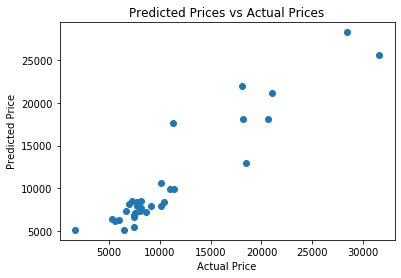

In [69]:
import matplotlib.pyplot as plt

#plotting predicted v/s actual prices
plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.title("Predicted Prices vs Actual Prices")
plt.show()

In [70]:
#save trained model
torch.save(model, 'my_model')

In [71]:
saved_model = torch.load('my_model')

In [72]:
y_pred_tensor = saved_model(x_test_tensor)

In [73]:
y_pred = y_pred_tensor.detach().numpy()

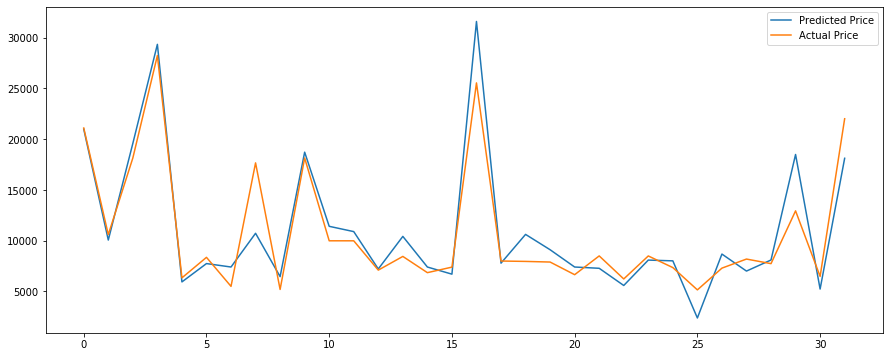

In [34]:
plt.figure(figsize=(15,6))

plt.plot(y_pred, label = 'Predicted Price')
plt.plot(y_test.values, label = 'Actual Price')

plt.legend()
plt.show()